# Transfer Learning with Keras 

- Let's look at theold model
- Modify the previous model to train it on new data. 

# The Old Model: MNist Dataset

In [19]:
from keras.datasets import mnist
from keras.utils import to_categorical

num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()



x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


## plots

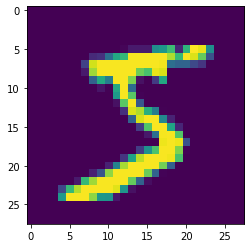

In [20]:
import matplotlib.pyplot as plt
import numpy as np

img = np.squeeze(x_train[0,...])

plt.figure()
plt.imshow(img)
plt.show()


### imports

In [21]:
from keras.layers import *
from keras.models import *
from keras.optimizers import *
from keras.losses import *
from keras.metrics import *


### create model

In [24]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))


In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])


In [26]:
batch_size = 128

num_classes = 10

epochs = 12

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 102s 2ms/step - loss: 0.2369 - accuracy: 0.9279 - val_loss: 0.0515 - val_accuracy: 0.9832
Epoch 2/12
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0856 - accuracy: 0.9743 - val_loss: 0.0441 - val_accuracy: 0.9861
Epoch 3/12
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0638 - accuracy: 0.9807 - val_loss: 0.0349 - val_accuracy: 0.9879
Epoch 4/12
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0540 - accuracy: 0.9833 - val_loss: 0.0346 - val_accuracy: 0.9888
Epoch 5/12
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0458 - accuracy: 0.9861 - val_loss: 0.0298 - val_accuracy: 0.9904
Epoch 6/12
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0403 - accuracy: 0.9875 - val_loss: 0.0345 - val_accuracy: 0.9899
Epoch 7/12
60000/60000 [==============================] - 107s

In [30]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02872034736951655
Test accuracy: 0.9919999837875366


# Transfer Learning 

<img src = "https://cdn-images-1.medium.com/freeze/max/1000/1*ZJmOqK41yURkbJpCvbLPhg.png?q=20" height = "100">



Our model has 8 layers. Let's freeze the first 6 layers to then feature extract on the last 2 layers. 


In [31]:
for layer in model.layers[:6]:
    layer.trainable = False
    
for layer in model.layers[6:]:
    layer.trainable=True
    
    

In [32]:
# Let's load and format pur new dataset: the MNIST Fashion Data set

In [34]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()



x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


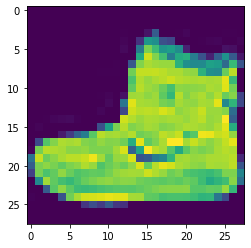

In [35]:
img = np.squeeze(x_train[0,...])

plt.figure()
plt.imshow(img)
plt.show()


In [36]:
batch_size = 128



Let's look at the model architecture

In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

C:\Users\coder\Anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [41]:
fine_tune_epochs = 10;
total_epochs = epochs + fine_tune_epochs

history_fine = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=total_epochs, initial_epoch = 12,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 13/22
60000/60000 [==============================] - 115s 2ms/step - loss: 0.4833 - accuracy: 0.8273 - val_loss: 0.3319 - val_accuracy: 0.8791
Epoch 14/22
60000/60000 [==============================] - 113s 2ms/step - loss: 0.3626 - accuracy: 0.8707 - val_loss: 0.2966 - val_accuracy: 0.8909
Epoch 15/22
60000/60000 [==============================] - 109s 2ms/step - loss: 0.3219 - accuracy: 0.8842 - val_loss: 0.2749 - val_accuracy: 0.9000
Epoch 16/22
60000/60000 [==============================] - 109s 2ms/step - loss: 0.2978 - accuracy: 0.8915 - val_loss: 0.2578 - val_accuracy: 0.9049
Epoch 17/22
60000/60000 [==============================] - 105s 2ms/step - loss: 0.2763 - accuracy: 0.8993 - val_loss: 0.2530 - val_accuracy: 0.9072
Epoch 18/22
60000/60000 [==============================] - 104s 2ms/step - loss: 0.2604 - accuracy: 0.9045 - val_loss: 0.2449 - val_accuracy: 0.9101
Epoch 19/22
60000/60000 [==============================]

In [42]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22860101442039013
Test accuracy: 0.9172000288963318
